In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd "/content/drive/My Drive/Data/3. Logistic regression"
!ls

/content/drive/.shortcut-targets-by-id/1AATOpUJ5hD7I5m2WsEadMdtQsWGv2h8p/Data/3. Logistic regression
 dataset.csv   LogisticRegression.ipynb  'Logistic regression.pdf'   Video.mp4


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Hàm sigmoid
import math
def sigmoid_math(x):
    return 1 / (1 + math.exp(-x))

In [ ]:
sigmoid_math(2)

0.8807970779778823

In [ ]:
x = np.random.rand(10000000)

In [ ]:
import time
start = time.time()
for i in range(x.shape[0]):
  sigmoid_math(x[i])
print('Time: ', time.time() - start)

Time:  4.700667381286621


In [ ]:
start = time.time()
y = sigmoid(x)
print('Time: ', time.time() - start)

Time:  0.24352192878723145


In [ ]:
# Load data từ file csv
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, d-1].reshape(-1, 1)

In [ ]:
# Vẽ data bằng scatter
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

Text(0, 0.5, 'kinh nghiệm (năm)')

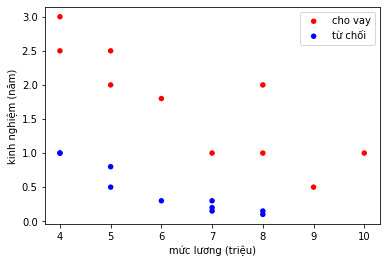

In [ ]:
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [ ]:
# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,0.1,0.1]).reshape(-1,1)

In [ ]:
x

array([[ 1.  , 10.  ,  1.  ],
       [ 1.  ,  5.  ,  2.  ],
       [ 1.  ,  6.  ,  1.8 ],
       [ 1.  ,  7.  ,  1.  ],
       [ 1.  ,  8.  ,  2.  ],
       [ 1.  ,  9.  ,  0.5 ],
       [ 1.  ,  4.  ,  3.  ],
       [ 1.  ,  5.  ,  2.5 ],
       [ 1.  ,  8.  ,  1.  ],
       [ 1.  ,  4.  ,  2.5 ],
       [ 1.  ,  8.  ,  0.1 ],
       [ 1.  ,  7.  ,  0.15],
       [ 1.  ,  4.  ,  1.  ],
       [ 1.  ,  5.  ,  0.8 ],
       [ 1.  ,  7.  ,  0.3 ],
       [ 1.  ,  4.  ,  1.  ],
       [ 1.  ,  5.  ,  0.5 ],
       [ 1.  ,  6.  ,  0.3 ],
       [ 1.  ,  7.  ,  0.2 ],
       [ 1.  ,  8.  ,  0.15]])

[3.06405355]
[3.06403308]
[3.06401262]
[3.06399216]
[3.0639717]
[3.06395123]
[3.06393077]
[3.06391031]
[3.06388985]
[3.06386939]
[3.06384893]
[3.06382847]
[3.06380801]
[3.06378755]
[3.06376709]
[3.06374663]
[3.06372618]
[3.06370572]
[3.06368526]
[3.0636648]
[3.06364434]
[3.06362389]
[3.06360343]
[3.06358297]
[3.06356252]
[3.06354206]
[3.06352161]
[3.06350115]
[3.0634807]
[3.06346024]
[3.06343979]
[3.06341933]
[3.06339888]
[3.06337843]
[3.06335797]
[3.06333752]
[3.06331707]
[3.06329662]
[3.06327616]
[3.06325571]
[3.06323526]
[3.06321481]
[3.06319436]
[3.06317391]
[3.06315346]
[3.06313301]
[3.06311256]
[3.06309211]
[3.06307166]
[3.06305121]
[3.06303076]
[3.06301031]
[3.06298987]
[3.06296942]
[3.06294897]
[3.06292852]
[3.06290808]
[3.06288763]
[3.06286719]
[3.06284674]
[3.06282629]
[3.06280585]
[3.0627854]
[3.06276496]
[3.06274451]
[3.06272407]
[3.06270363]
[3.06268318]
[3.06266274]
[3.0626423]
[3.06262186]
[3.06260141]
[3.06258097]
[3.06256053]
[3.06254009]
[3.06251965]
[3.06249921]
[3.0

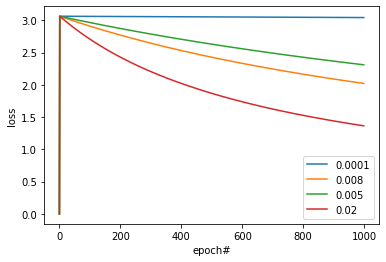

In [ ]:
# Số lần lặp bước 2
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
#learning_rate = 0.01

def GD(x,y,w,learning_rate):
  for i in range(1, numOfIteration):
    
	 # Tính giá trị dự đoán
      y_predict = sigmoid(np.dot(x, w))
      cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    # np.dot: nhan ma tran, * / multiply : element-wise
      w = w - learning_rate * np.dot(x.T, y_predict-y)	 
      print(cost[i])
  return cost

learning_rates = [0.0001,0.008,0.005,0.02]
for num,l_r in enumerate(learning_rates):
    loss = GD(x,y,w,l_r)
    plt.plot(loss, label = str(l_r))
    plt.legend()
    
plt.xlabel("epoch#")
plt.ylabel("loss")
plt.show()

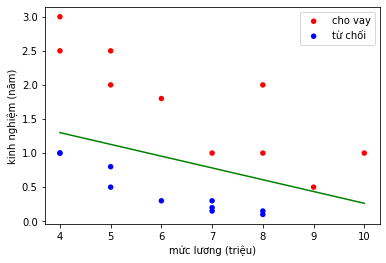

In [ ]:
# Vẽ đường phân cách.
t = 0.5
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

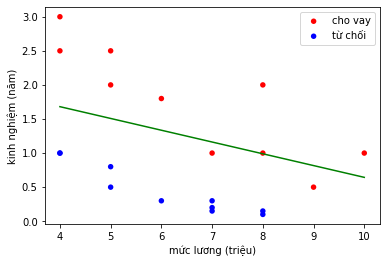

In [ ]:
# Vẽ đường phân cách.
t = 0.8
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()